<h1>Coursera IBM Data Science Capstone<h1>

This notebook will be used for the Coursera capstone project

In [49]:
import numpy as np  
import pandas as pd 

In [50]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


<H1>Introduction<H1>

More than 30,000 people die every year in crashes in the United States alone, and over 4 million people are injured. Undoubtledly this is a serious problem, and preventing some of these deaths or injuries is a worthy cause. It is thought that weather conditions play a role in up to 20 percent of car accidents, leading to secondary accident related factors such as suboptimal lighting and bad road conditions. In this project, I explore whether data regarding these conditions can be effectively utilized in creating a predictive mechanism. My research question is "Can the severity of traffic accidents be predicted as per weather, lighting and road conditions?"

<H1>Data<H1>

For this project analysis I use collision data provided by the Seattle police department (SPD) and recorded by Traffic Records. The data includes information on all kinds of collisions, those resulting in property damage, physical injury, and fatalities. The dataset in its entirety (before processing) is summarized as follows:

In [51]:
df = pd.read_csv('Collisions.csv')
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,213797.000000,213797.000000,221266.000000,221266.000000,221266.000000,71823.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221266.000000,221265.000000,1.272050e+05,221266.000000,2.212660e+05
mean,-122.330752,47.620205,110633.500000,144603.603179,144831.128840,37616.272768,2.226230,0.038103,0.027293,1.728544,0.373844,0.015149,0.001681,13.383558,7.971063e+06,261.441573,9.588454e+03
std,0.030054,0.056040,63874.136669,89039.925169,89413.579421,51905.450406,1.470364,0.201745,0.164345,0.831224,0.732086,0.157908,0.044562,7.302961,2.611523e+06,3248.850406,7.150262e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577302,55317.250000,71603.250000,71603.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330348,47.616053,110633.500000,127122.500000,127122.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,165949.750000,209654.750000,209874.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221266.000000,333683.000000,335183.000000,757580.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [52]:
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,...,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,...,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N


<H1>Methodology<H1>
<H2>Data Analysis and Cleaning<H2>

In order to begin, the first step in preparing the data was to filter only the information that is relevant for this project, namely the accident severity, weather, road conditions, and lighting conditions

In [53]:
df = df[["SEVERITYCODE","WEATHER","ROADCOND",'LIGHTCOND']]
df.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Clear,Dry,Daylight
1,2,Raining,Wet,Dark - Street Lights On
2,1,Clear,Dry,Daylight
3,1,Raining,Wet,Dark - Street Lights On
4,0,NaN,NaN,NaN


It is immediately clear that the data includes values which are unusable, such as NaN, Unknown, Other, and 0 values. The following steps clean the data of these values.

In [54]:
missing_values = df.dropna(axis=0, inplace=False)
missing_values = missing_values.dropna(axis=0, inplace=False)
missing_values = missing_values.drop(missing_values[missing_values['SEVERITYCODE'] == "0"].index,inplace=False)
missing_values = missing_values.drop(missing_values[missing_values['WEATHER'] == "Unknown"].index,inplace=False)
missing_values = missing_values.drop(missing_values[missing_values['WEATHER'] == "Other"].index,inplace=False)
missing_values = missing_values.drop(missing_values[missing_values['ROADCOND'] == "Other"].index,inplace=False)
missing_values = missing_values.drop(missing_values[missing_values['LIGHTCOND'] == "Other"].index,inplace=False)
missing_values.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND
0,2,Clear,Dry,Daylight
1,2,Raining,Wet,Dark - Street Lights On
2,1,Clear,Dry,Daylight
3,1,Raining,Wet,Dark - Street Lights On
6,1,Clear,Dry,Dark - Street Lights On


The original police report includes a 2b severity code for severe injury, I chose to merge this with the value 2 which refers to injury. Now the severities are:

1. Property Damage 
2. Injury 
3. Fatalities

In [55]:
replace_2s = missing_values.replace("2b", 2)
processing = replace_2s

In order to use the data, the categorical values must be converted to numerical, so I used find and replace, and then label encoding as follows:

In [56]:
processing['SEVERITYCODE'] = processing['SEVERITYCODE'].astype("int")
processing["WEATHER"] = processing["WEATHER"].astype('category')
processing["Weather_cat"] = processing["WEATHER"].cat.codes
processing["ROADCOND"] = processing["ROADCOND"].astype('category')
processing["Road_Condition_cat"] = processing["ROADCOND"].cat.codes
processing["LIGHTCOND"] = processing["LIGHTCOND"].astype('category')
processing["Light_Condition_cat"] = processing["LIGHTCOND"].cat.codes
processing.head()

,SEVERITYCODE,WEATHER,ROADCOND,LIGHTCOND,Weather_cat,Road_Condition_cat,Light_Condition_cat
0,2,Clear,Dry,Daylight,1,0,5
1,2,Raining,Wet,Dark - Street Lights On,5,7,2
2,1,Clear,Dry,Daylight,1,0,5
3,1,Raining,Wet,Dark - Street Lights On,5,7,2
6,1,Clear,Dry,Dark - Street Lights On,1,0,2


The next stage is to visually explore the data with Seaborn:

[Text(0, 0, 'Blowing Sand/Dirt'),
 Text(1, 0, 'Clear'),
 Text(2, 0, 'Fog/Smog/Smoke'),
 Text(3, 0, 'Overcast'),
 Text(4, 0, 'Partly Cloudy'),
 Text(5, 0, 'Raining'),
 Text(6, 0, 'Severe Crosswind'),
 Text(7, 0, 'Sleet/Hail/Freezing Rain'),
 Text(8, 0, 'Snowing')]

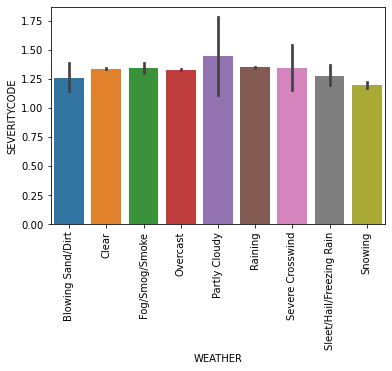

In [57]:
import seaborn as sns
chart = sns.barplot(x="WEATHER", y="SEVERITYCODE", data=processing)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Dark - No Street Lights'),
 Text(1, 0, 'Dark - Street Lights Off'),
 Text(2, 0, 'Dark - Street Lights On'),
 Text(3, 0, 'Dark - Unknown Lighting'),
 Text(4, 0, 'Dawn'),
 Text(5, 0, 'Daylight'),
 Text(6, 0, 'Dusk'),
 Text(7, 0, 'Unknown')]

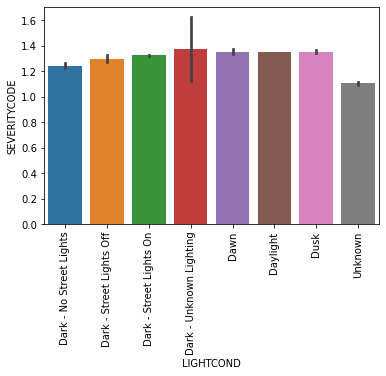

In [58]:
chart = sns.barplot(x="LIGHTCOND", y="SEVERITYCODE", data=processing)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

[Text(0, 0, 'Dry'),
 Text(1, 0, 'Ice'),
 Text(2, 0, 'Oil'),
 Text(3, 0, 'Sand/Mud/Dirt'),
 Text(4, 0, 'Snow/Slush'),
 Text(5, 0, 'Standing Water'),
 Text(6, 0, 'Unknown'),
 Text(7, 0, 'Wet')]

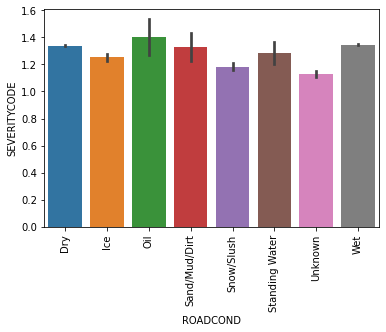

In [59]:
chart = sns.barplot(x="ROADCOND", y="SEVERITYCODE", data=processing)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

In [60]:
post_formatting = processing

<h2>Modeling<h2>

Next, the data will be modeled using machine learning via K Nearest Neighbors:

In [61]:
X = np.asarray(post_formatting[['Weather_cat','Road_Condition_cat', 'Light_Condition_cat']])
y = np.asarray(post_formatting['SEVERITYCODE'])
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
from sklearn.neighbors import KNeighborsClassifier
k = 6
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)

<h1>Results<h1>

In [62]:
from sklearn import metrics
print("Precision:", metrics.precision_score(y_test, yhat, average='micro'))
print("Recall:", metrics.recall_score(y_test, yhat, average='micro'))
print("F1 score:", metrics.f1_score(y_test, yhat, average = 'micro'))
print("Accuracy:", metrics.accuracy_score(y_test, yhat))

Precision: 0.6650756214435459
Recall: 0.6650756214435459
F1 score: 0.6650756214435459
Accuracy: 0.6650756214435459


<h1>Discussion<h1>

The overall accuracy of the model is 66.5%. The micro average precision, recall, and accuracy scores are mathematically equivalent, so they are also 66.5%. The accuracy achieved by this model is significantly above random and we can therefore conclude that this is a viable model.

<h1>Conclusion<h1>

Returning to the research question of "Can the severity of traffic accidents be predicted as per weather, lighting and road conditions?" the answer is yes.